In [2]:
#Para conseguir un dataset con una dimensión reducidad, aplica la técnica de Selección de variables basada en árbol de decisión mediante 
#las importancias de cada variable (Decision Trees Importances):

#Filtra el tablón para quedarnos solamente con las variables que aglutinan hasta el 95% de la información que se requiere para estimar la variable objetivo.
#random_state=100
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.tree import DecisionTreeRegressor



In [3]:
datos = pd.read_csv('covtype.data')

In [4]:
columnas_Wilderness_Area = ["Wilderness_Area" + str(i) for i in range(1, 5)]
columnas_Soil_Type = ["Soil_Type" + str(i) for i in range(1, 41)]
columnas_restantes = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
"Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon",
"Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]
columna_ultima = ["Cover_Type"]
columnas_final = columnas_restantes + columnas_Wilderness_Area + columnas_Soil_Type + columna_ultima


In [5]:
datos.columns = columnas_final


In [6]:
#datos.to_csv('covtype_1.data', index=False)

In [7]:
#EJERCICIO 1
X = datos.drop('Cover_Type', axis=1)
y = datos['Cover_Type']

In [8]:
#Crear un modelo de árbol de decisión y ajustarlo a los datos:
tree_model = DecisionTreeRegressor(random_state=100)
tree_model.fit(X, y)

DecisionTreeRegressor(random_state=100)

In [9]:
#Obtener las importancias de las variables:
importances = pd.Series(tree_model.feature_importances_, index=X.columns)

In [10]:
#Ordenar las importancias de las variables de mayor a menor:
sorted_importances = importances.sort_values(ascending=False)

In [11]:
#Calcular la suma acumulada de las importancias y el porcentaje que representa cada variable:
cumulative_importances = sorted_importances.cumsum()
cumulative_importances_percent = 100*cumulative_importances/cumulative_importances[-1]

In [12]:
#Seleccionar las variables que aglutinan hasta el 95% de la información requerida:
selected_variables = cumulative_importances_percent[cumulative_importances_percent <= 95].index
selected_variables = selected_variables.append(pd.Index(["Cover_Type"]))

print(selected_variables)

Index(['Elevation', 'Horizontal_Distance_To_Fire_Points',
       'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Wilderness_Area3', 'Soil_Type32',
       'Hillshade_9am', 'Hillshade_Noon', 'Aspect', 'Wilderness_Area1',
       'Hillshade_3pm', 'Soil_Type39', 'Slope', 'Wilderness_Area2',
       'Soil_Type38', 'Soil_Type35', 'Soil_Type33', 'Cover_Type'],
      dtype='object')


In [13]:
datos_1 = datos[selected_variables]
print(datos_1)

        Elevation  Horizontal_Distance_To_Fire_Points  \
0            2590                                6225   
1            2804                                6121   
2            2785                                6211   
3            2595                                6172   
4            2579                                6031   
...           ...                                 ...   
581006       2396                                 837   
581007       2391                                 845   
581008       2386                                 854   
581009       2384                                 864   
581010       2383                                 875   

        Horizontal_Distance_To_Roadways  Horizontal_Distance_To_Hydrology  \
0                                   390                               212   
1                                  3180                               268   
2                                  3090                               242   
3      

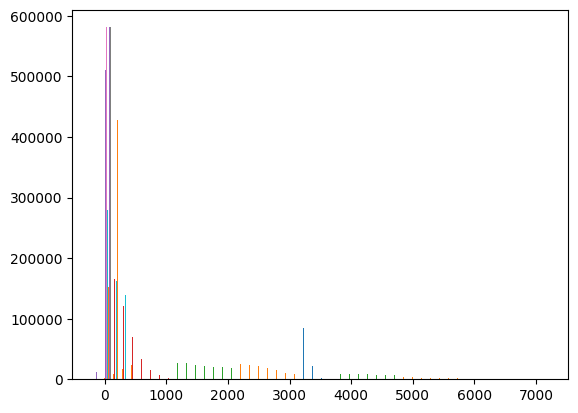

In [14]:
#EJERCICIO2

# Generar histograma de todas las variables
plt.hist(datos_1.values, bins=50)
plt.show()


In [15]:
# Normalizar todas las columnas excepto la última
cols_to_normalize = datos_1.columns[:-1]
datos_1[cols_to_normalize] = (datos_1[cols_to_normalize] - datos_1[cols_to_normalize].min()) / (datos_1[cols_to_normalize].max() - datos_1[cols_to_normalize].min())
datos_1['Cover_Type'] = datos_1['Cover_Type'] - 1 

C:\Users\smite\AppData\Local\Temp\ipykernel_26492\3583928770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_1[cols_to_normalize] = (datos_1[cols_to_normalize] - datos_1[cols_to_normalize].min()) / (datos_1[cols_to_normalize].max() - datos_1[cols_to_normalize].min())
C:\Users\smite\AppData\Local\Temp\ipykernel_26492\3583928770.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_1['Cover_Type'] = datos_1['Cover_Type'] - 1


In [16]:
datos_norm = datos_1.copy()

In [17]:
#EJERCICIO3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(datos_norm.iloc[:, :-1], datos_norm.iloc[:, -1], test_size=0.2, random_state=100)

# entrenar modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=100)
model.fit(X_train, y_train)



C:\Users\smite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=100)

In [18]:
# predecir en datos de test y calcular métricas de evaluación
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
report = classification_report(y_test, y_pred, zero_division=0)
matrix = confusion_matrix(y_test, y_pred)

# imprimir resultados
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Classification report:\n", report)
print("Confusion matrix:\n", matrix)

Accuracy: 0.7130366685885906
F1-score: 0.7010355321839222
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70     42680
           1       0.74      0.80      0.77     56417
           2       0.63      0.76      0.69      7136
           3       0.76      0.25      0.37       578
           4       0.00      0.00      0.00      1873
           5       0.39      0.16      0.23      3400
           6       0.73      0.52      0.61      4119

    accuracy                           0.71    116203
   macro avg       0.56      0.45      0.48    116203
weighted avg       0.70      0.71      0.70    116203

Confusion matrix:
 [[29632 12244    11     0     0    13   780]
 [10418 44958   766     0     0   249    26]
 [    0  1124  5445    27     0   540     0]
 [    0     3   381   143     0    51     0]
 [    3  1824    36     0     0    10     0]
 [    0   878  1964    17     0   541     0]
 [ 1957    24     0     0     0 

In [19]:
#EJERCICIO 4

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Instanciar el modelo de árbol de decisión
tree = DecisionTreeClassifier(random_state=100)

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(datos_1.iloc[:, :-1], datos_1.iloc[:, -1], test_size=0.2, random_state=100)

# Entrenar el modelo en los datos de entrenamiento
tree.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = tree.predict(X_test)


In [20]:
# Calcular las métricas de evaluación del modelo
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
report = classification_report(y_test, y_pred, zero_division=0)
cm = confusion_matrix(y_test, y_pred)

# Imprimir las métricas de evaluación del modelo
print("Accuracy:", acc)
print("F1-score (weighted):", f1)
print("Classification report:\n", report)
print("Confusion matrix:\n", cm)


Accuracy: 0.9284700050773216
F1-score (weighted): 0.9284451619503575
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     42680
           1       0.94      0.94      0.94     56417
           2       0.91      0.91      0.91      7136
           3       0.79      0.79      0.79       578
           4       0.81      0.79      0.80      1873
           5       0.84      0.84      0.84      3400
           6       0.94      0.93      0.94      4119

    accuracy                           0.93    116203
   macro avg       0.88      0.88      0.88    116203
weighted avg       0.93      0.93      0.93    116203

Confusion matrix:
 [[39675  2711     8     0    44    13   229]
 [ 2674 53084   213     3   272   148    23]
 [    8   194  6489    82    29   334     0]
 [    0     0    88   457     0    33     0]
 [   45   322    16     0  1478    12     0]
 [    8   161   321    35     6  2869     0]
 [  248    31     0  

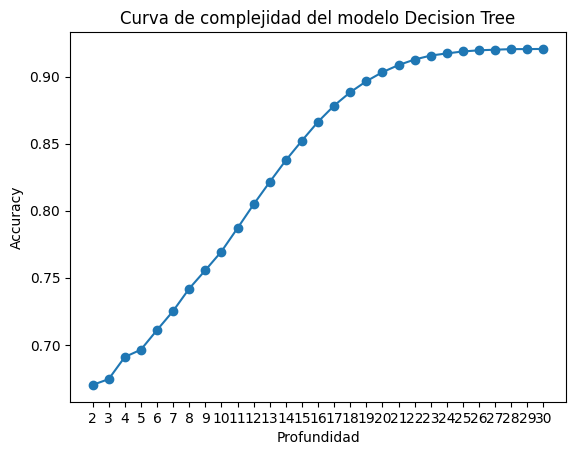

El valor óptimo de la profundidad del árbol es: 30


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir rango de profundidades
depths = range(2, 31)

# Crear modelo Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=100)

# Definir parámetros de GridSearchCV
param_grid = {'max_depth': depths}

# Realizar GridSearchCV
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Guardar resultados de GridSearchCV
results = grid_search.cv_results_

# Obtener los valores de los parámetros y el score
params = results['params']
scores = results['mean_test_score']

# Crear gráfica de curva de complejidad
plt.plot(depths, scores, '-o')
plt.xlabel('Profundidad')
plt.ylabel('Accuracy')
plt.title('Curva de complejidad del modelo Decision Tree')
plt.xticks(depths)
plt.show()

# Obtener mejor valor de profundidad del árbol
best_depth = grid_search.best_params_['max_depth']
print('El valor óptimo de la profundidad del árbol es:', best_depth)


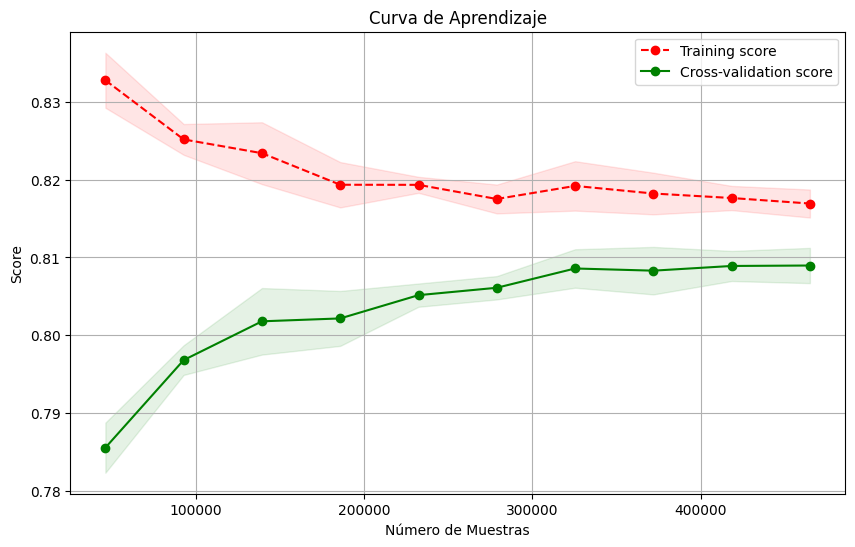

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(.1, 1.0, 10)):
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title("Curva de Aprendizaje")
    plt.xlabel("Número de Muestras")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    plt.show()
    
# Generamos la curva de aprendizaje para el modelo Decision Tree Classifier con profundidad óptima
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=100)
dtc = DecisionTreeClassifier(max_depth=12, random_state=100)
plot_learning_curve(dtc, X, y, cv)


In [23]:
#EJERCICIO5
from sklearn.ensemble import RandomForestClassifier

# Entrenamiento del modelo
rfc = RandomForestClassifier(random_state=100, oob_score=True)
rfc.fit(X_train, y_train)

# Evaluación del modelo
y_pred = rfc.predict(X_test)

rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_f1 = f1_score(y_test, y_pred, average='weighted')
rfc_report = classification_report(y_test, y_pred, zero_division=0)
rfc_cm = confusion_matrix(y_test, y_pred)
rfc_oob = rfc.oob_score_

In [24]:
tree_depths = [estimator.tree_.max_depth for estimator in rfc.estimators_]
median_tree_depth = np.median(tree_depths)


In [25]:
from sklearn.model_selection import GridSearchCV

# Definición de los rangos para cada hiperparámetro
n_estimators_range = np.arange(200, 450, 50)
max_depth_range = np.arange(20, 42, 2)
max_features_range = ["auto", "log2", None]

# Definición de los parámetros a evaluar en GridSearchCV
params_grid = {
    "n_estimators": n_estimators_range,
    "max_depth": max_depth_range,
    "max_features": max_features_range
}

# Creación del modelo con GridSearchCV y evaluación
rfc_opt = GridSearchCV(RandomForestClassifier(random_state=100), params_grid, scoring='accuracy', cv=5, n_jobs=-1)
rfc_opt.fit(X_train, y_train)

# Evaluación del modelo óptimo
y_pred = rfc_opt.predict(X_test)

rfc_opt_accuracy = accuracy_score(y_test, y_pred)
rfc_opt_f1 = f1_score(y_test, y_pred, average='weighted')
rfc_opt_report = classification_report(y_test, y_pred, zero_division=0)
rfc_opt_cm = confusion_matrix(y_test, y_pred)
rfc_opt_oob = rfc_opt.best_estimator_.oob_score_


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import learning_curve

# Definición de la función para obtener la gráfica del Learning Curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
title = "Learning Curves (Random Forest)"
plot_learning_curve(RandomForestClassifier(n_estimators=350, max_depth=22, max_features='auto', random_state=100), title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()